In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
dataset = pd.read_csv("/Users/pawankumarkc/Documents/vscodepython/NLP/Libraries/Practice Datasets/Titanic.csv")

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#check missing data

dataset.isnull().sum()

#Age and Cabin has missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Percentage of missing data
dataset.isnull().sum()/len(dataset)*100

#Cabin has more than 25% missing data, drop this cabin

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
dataset = dataset.drop('Cabin', axis=1)

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
dataset.info()
#Age is float value, Embarked is object
#These columns needs to be imouted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
dataset['Embarked'].fillna('S', inplace=True)

In [13]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
#Age column - Conclusion: 
#Age is almost 20% of the values are missing
#Check outlier, on that basis decide imputation

dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

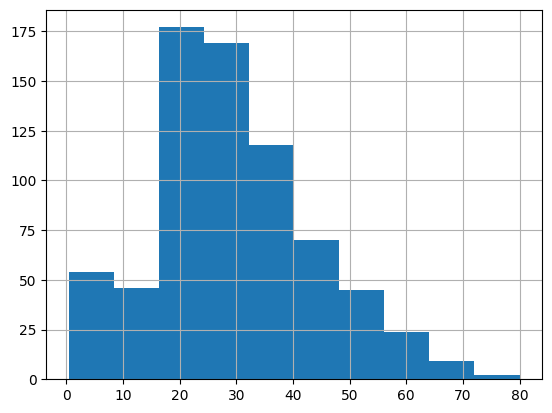

In [17]:
dataset['Age'].hist()

<Axes: >

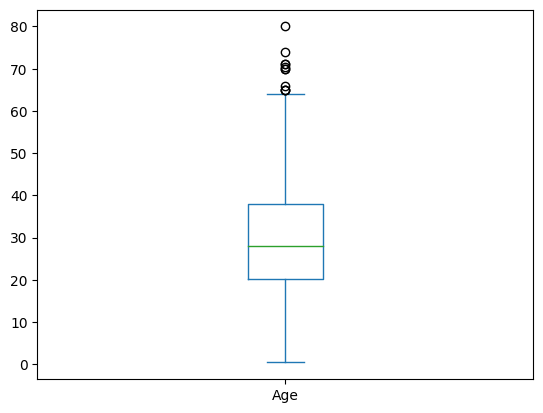

In [18]:
dataset['Age'].plot(kind='box')

In [21]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
dataset = dataset.drop(['PassengerId','Name', 'Ticket', 'Fare'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [23]:
#Encoding for gender, sex, embarked
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'] = dataset['Sex'].cat.codes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 42.8+ KB


In [26]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
#One hot encoding
dataset = pd.get_dummies(dataset, columns=['Embarked'])
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [28]:
#dummy variable (Remove one encoded variable)
dataset = dataset.iloc[:,:-1]
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,0,0
1,1,1,0,38.0,1,0,1,0
2,1,3,0,26.0,0,0,0,0
3,1,1,0,35.0,1,0,0,0
4,0,3,1,35.0,0,0,0,0


In [29]:
#Feature scaling
# Remember: We cannot do feature scaling with dependent variable

x=dataset.iloc[:,1:]
y=dataset['Survived']

In [32]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,0,0
1,1,0,38.0,1,0,1,0
2,3,0,26.0,0,0,0,0
3,1,0,35.0,1,0,0,0
4,3,1,35.0,0,0,0,0


In [33]:
#Feature scaling

x1 = x.copy()

# Standardization

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x)

#Here we get negative values also

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.482043,-0.307562
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,2.074505,-0.307562
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.482043,-0.307562
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,-0.482043,-0.307562
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.482043,-0.307562
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.482043,-0.307562
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.482043,-0.307562
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.482043,-0.307562
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,2.074505,-0.307562


# Normalization 

In [35]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x1 = nor.fit_transform(x1)
pd.DataFrame(x1)

#Here all the data is between 0 and 1

,0,1,2,3,4,5,6
0,0.134840,0.044947,0.988826,0.044947,0.000000,0.000000,0.000000
1,0.026288,0.000000,0.998963,0.026288,0.000000,0.026288,0.000000
2,0.114624,0.000000,0.993409,0.000000,0.000000,0.000000,0.000000
3,0.028548,0.000000,0.999185,0.028548,0.000000,0.000000,0.000000
4,0.085367,0.028456,0.995943,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
886,0.073821,0.036911,0.996588,0.000000,0.000000,0.000000,0.000000
887,0.052559,0.000000,0.998618,0.000000,0.000000,0.000000,0.000000
888,0.106199,0.000000,0.991189,0.035400,0.070799,0.000000,0.000000
889,0.038376,0.038376,0.997788,0.000000,0.000000,0.038376,0.000000


In [39]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'